# 计算 SLIC 超像素分割的邻接矩阵

本来应该不是很复杂，但是 scipy 系列的文档实在是太松散了，找了查了好写文档才搞明白。

In [135]:
import numpy as np
from skimage.io import imread
from skimage import segmentation
from skimage.util import img_as_float
from skimage.future import graph
from networkx.linalg import adj_matrix
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

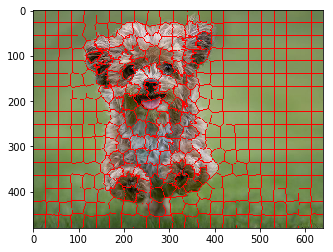

In [136]:
img = imread("dog.jpg")
img = img_as_float(img)
# SLIC 分割
labels = segmentation.slic(img, compactness=30, n_segments=400)
# labels 转 graph
g = graph.RAG(labels)
# 算邻接矩阵
adj = adj_matrix(g).todense()

img_with_boundaries = segmentation.mark_boundaries(img, labels, color=[1,0,0])
plt.imshow(img_with_boundaries)

`labels` 是 SLIC 分割后的结果，每块分割区域内的label值相同

In [137]:
print(labels.shape, "v.s.", img.shape)
print(np.unique(labels).size)

(480, 640) v.s. (480, 640, 3)
390


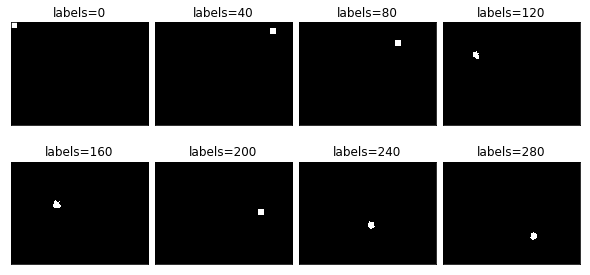

In [138]:
fig,axes = plt.subplots(2,4,figsize=(8,4))
for idx, ax in enumerate(axes.flatten()):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("labels=%d"%(idx*40))
    ax.imshow(labels==(idx*40),cmap=cm.Greys_r)
plt.tight_layout(pad=0)

计算这些分割区域的邻接矩阵（adjacency matrix）

In [139]:
from networkx.linalg import adj_matrix
from skimage.future import graph
g = graph.RAG(labels)
adj = adj_matrix(g).todense()

$\text{adj}_{i,j}=1$ 表示 i 和 j 两个区域相邻


Text(0.5, 1.0, 'adj[388,373]=1')

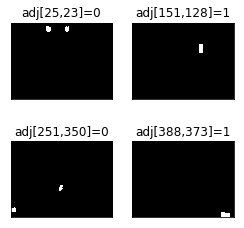

In [140]:
fig,axes = plt.subplots(2,2,figsize=(4,4))
for idx, ax in enumerate(axes.flatten()):
    ax.set_xticks([])
    ax.set_yticks([])
axes[0,0].imshow(np.logical_or(labels==25, labels==23), cmap=cm.Greys_r)
axes[0,0].set_title("adj[%d,%d]=%d"%(25,23,adj[25,23]))

axes[0,1].imshow(np.logical_or(labels==151, labels==128), cmap=cm.Greys_r)
axes[0,1].set_title("adj[%d,%d]=%d"%(151,128,adj[151,128]))

axes[1,0].imshow(np.logical_or(labels==251, labels==350), cmap=cm.Greys_r)
axes[1,0].set_title("adj[%d,%d]=%d"%(251,350,adj[251,350]))

axes[1,1].imshow(np.logical_or(labels==388, labels==373), cmap=cm.Greys_r)
axes[1,1].set_title("adj[%d,%d]=%d"%(388,373,adj[388,373]))